In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# compare velocity and traveling length

In [3]:

def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
    return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

In [2]:
Lscale = 1./59.

In [3]:
Tscale = 1./25.

In [4]:
Vscale = Lscale / Tscale

In [9]:
filelist = [ 
        'D:/Ratchet_compare/ratchet4/20201123a-ratchet(simple increasing)5EXP.avi',
        'D:/Ratchet_compare/ratchet4/20201214a-ratchet(simple increasing)5LINEAR.avi',
        'D:/Ratchet_compare/ratchet4/20201214a-ratchet(simple increasing)SQUARE.avi',
            ]

meanVlist = []
stdVlist = []
travelLlist = []
stdLlist = []
for filename in filelist :
    dataname = filename[:-4]+'_trackinfo.pkl'
    print(dataname)
    trackinfo = pd.read_pickle(dataname)
    #print(trackinfo.tail())
    filterinfo = trackinfo.loc[(trackinfo['maxmove'] >= 100)].sort_values(by='IDcounts',ascending=False)
    #print(filterinfo.tail())
    meanVlist.append(np.mean(filterinfo['meanV'].values)*Vscale)
    stdVlist.append(np.std(filterinfo['meanV'].values)*Vscale)
    travelLlist.append(np.mean(filterinfo['travelL'].values)*Vscale)
    stdLlist.append(np.std(filterinfo['travelL'].values)*Vscale)

E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)_trackinfo.pkl
E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)2_trackinfo.pkl
E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)3_trackinfo.pkl


In [17]:
print(meanVlist,stdVlist,travelLlist,stdLlist)

[1.4530640405367905, 1.0483565819880158, 1.346661823917871] [0.47011051996679043, 0.30756560303731784, 0.4486784267203964] [212.58298266036692, 187.72347512908388, 178.41661320304226] [83.09968566836365, 53.50892853101533, 54.29923907470088]


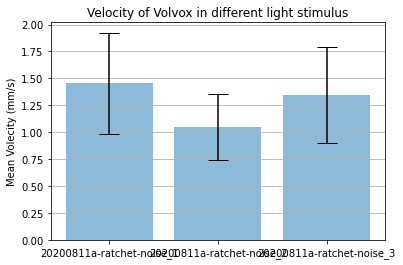

In [18]:
materials = ['20200811a-ratchet-noise_1','20200811a-ratchet-noise_2','20200811a-ratchet-noise_3']
x_pos = np.arange(3)
fig, ax = plt.subplots()
ax.bar(x_pos, meanVlist, yerr=stdVlist, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Volecity (mm/s)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Velocity of Volvox in different light stimulus')
ax.yaxis.grid(True)

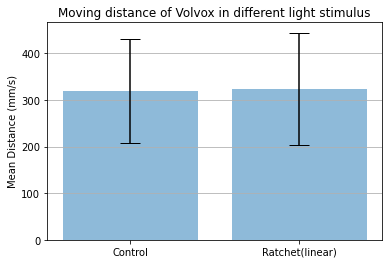

In [12]:
materials = ['Control', 'Ratchet(linear)']
x_pos = np.arange(2)
fig, ax = plt.subplots()
ax.bar(x_pos, travelLlist, yerr=stdLlist, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Distance (mm/s)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Moving distance of Volvox in different light stimulus')
ax.yaxis.grid(True)

In [ ]:
IDcounts = []
meanR = []
stdR = []
meanV = [] 
stdV = []
ID = []
travelL = []
absV = []
maxmove = []
for vID in pd.unique(filterlink['particle'].values):
    filterid = (filterlink['particle']==vID)
    IDcounts.append(filterlink[filterid].shape[0])
    x=filterlink[filterid]['x'].values
    y=filterlink[filterid]['y'].values
    t=filterlink[filterid]['frame'].values
    r=filterlink[filterid]['radius'].values
    meanR.append(r.mean())
    stdR.append(r.std())
    meanV.append(velocity2D(x=x,y=y,t=t).mean())
    stdV.append(velocity2D(x=x,y=y,t=t).std())
    travelL.append(np.sum(distance2D(x,y)))
    absV.append(np.sum(distance2D(x,y))/(max(t)-min(t)))
    maxmove.append(max((max(x)-min(x)),(max(y)-min(y))))
    ID.append(vID)
    
trackinfo = pd.DataFrame({'IDcounts':IDcounts,'meanR':meanR,'stdR':stdR,'meanV':meanV,'stdV':stdV,'absV':absV,'travelL':travelL,'maxmove':maxmove,'ID':ID})

# plot traveling angle

In [4]:
from math import atan2
from math import degrees
import math

In [26]:
filename = 'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)_track.pkl'
trackdata = pd.read_pickle(filename)
filename = 'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)_trackinfo.pkl'
trackinfo = pd.read_pickle(filename)

In [14]:
trackinfo.head()

IDcounts     meanR      stdR     meanV      stdV      absV     travelL  \
0       146  9.109589  0.836851  3.754236  1.648628  3.674441  562.189406   
1       171  7.052632  1.381850  1.761391  1.718827  1.654241  320.922721   
2       104  5.365385  0.636361  1.238452  1.088000  1.069379  164.684387   
3       147  7.136054  1.047442  2.247965  1.282686  2.180520  331.438984   
4       100  5.390000  0.947576  2.151584  1.802636  1.861306  314.560745   

   maxmove   ID  
0      118   40  
1       36   45  
2        8  109  
3       48  145  
4       80  153

In [7]:
trackdata.head()

x     y  radius  frame  particle
0    2148  1108      16      0         0
744  1034  1372      13      0         1
745  2224   316      13      0         2
746  3196   976      12      0         3
747  3452  1974      12      0         4

E:/0811/20200811a-noise(alternate grid).avi


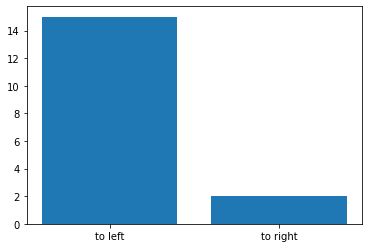

E:/0811/20200811a-noise(alternate grid)2.avi


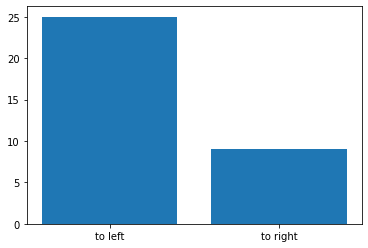

E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker).avi


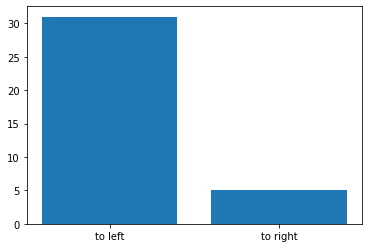

E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)2.avi


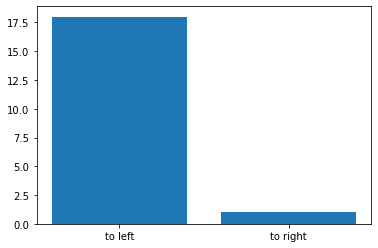

E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)3.avi


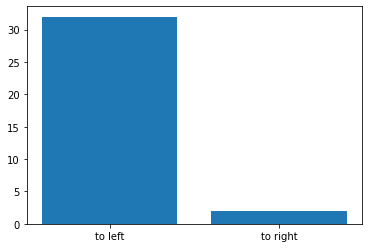

E:/0824/20200824a-control.avi


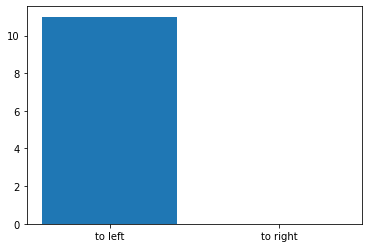

E:/0824/20200824a-control2.avi


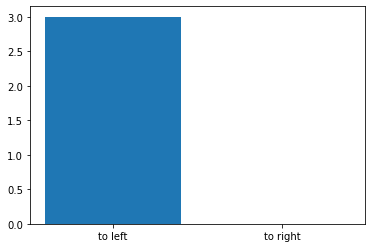

E:/0824/20200824a-control4.avi


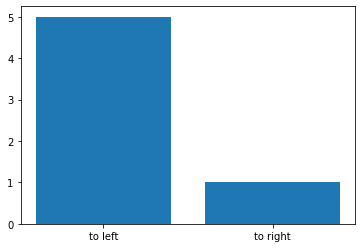

E:/0824/20200824a-ratchet-noise(alter stimulus and periodic chacker)2.avi


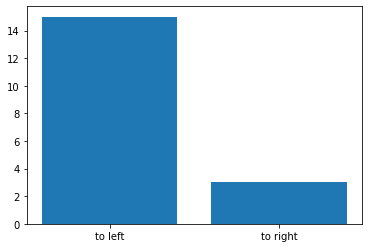

E:/0824/20200824a-ratchet-noise(alter stimulus and periodic chacker)3.avi


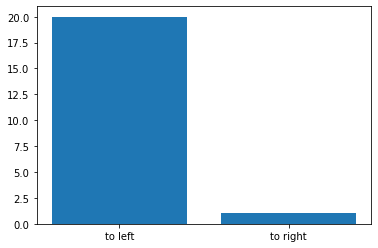

E:/0824/20200824a-ratchet-noise(alter stimulus and periodic chacker)4.avi


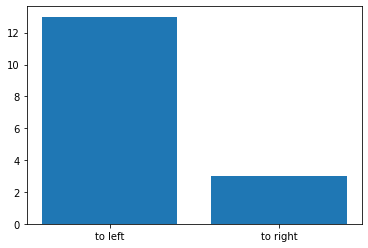

In [79]:
filelist = [
        'E:/0811/20200811a-noise(alternate grid).avi',
        'E:/0811/20200811a-noise(alternate grid)2.avi',
        'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker).avi',
        'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)2.avi',
        'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)3.avi',
#         'E:/0814/20200814a-ratchet-noise(alter stimulus and periodic chacker).avi',
# #         'E:/0814/20200814a-ratchet-noise(alter stimulus and periodic chacker)2.avi',
#         'E:/0814/20200814a-ratchet-noise(alter stimulus and periodic chacker)3.avi',
#         'E:/0814/20200814a-ratchet-noise(alter stimulus and periodic chacker)4.avi',
#         'E:/0817/20200817a-ratchet-noise(alter stimulus and periodic chacker)3b.avi',
#         'E:/0817/20200817a-ratchet-noise(alter stimulus and periodic chacker)4.avi',
#         'E:/0817/20200817a-ratchet-noise(alter stimulus and periodic chacker)5.avi',
#         'E:/0817/20200817a-ratchet-noise(alter stimulus and periodic chacker)6.avi',
#         'E:/0818/20200818a-ratchet-noise(alter stimulus and periodic chacker)3.avi',
#         'E:/0818/20200818a-ratchet-noise(alter stimulus and periodic chacker)4.avi',
#         'E:/0818/20200818a-ratchet-noise(alter stimulus and periodic chacker)5nop.avi',
#         'E:/0818/20200818a-ratchet-noise(alter stimulus and periodic chacker)6nop.avi',
#         'E:/0821/20200821a-ratchet-noise(alter stimulus and periodic chacker).avi',
#         'E:/0821/20200821a-ratchet-noise(alter stimulus and periodic chacker)2.avi',
#         'E:/0821/20200821a-ratchet-noise(alter stimulus and periodic chacker)3.avi',
#         'E:/0821/20200821a-ratchet-noise(alter stimulus and periodic chacker)4.avi',
        'E:/0824/20200824a-control.avi',
        'E:/0824/20200824a-control2.avi',
        'E:/0824/20200824a-control4.avi',
        'E:/0824/20200824a-ratchet-noise(alter stimulus and periodic chacker)2.avi',
        'E:/0824/20200824a-ratchet-noise(alter stimulus and periodic chacker)3.avi',
        'E:/0824/20200824a-ratchet-noise(alter stimulus and periodic chacker)4.avi',
        ]

meanVlist = []
stdVlist = []
travelLlist = []
stdLlist = []
for filename in filelist :
    trackname = filename[:-4]+'_track.pkl'
    trackdata = pd.read_pickle(trackname)
    infoname = filename[:-4]+'_trackinfo.pkl'
    trackinfo = pd.read_pickle(infoname)
    filterinfo = trackinfo.loc[(trackinfo['maxmove'] >= 100)].sort_values(by='IDcounts',ascending=False)
    degreeCount = np.zeros(360)
    moveX = []
    moveY = []
    print(filename)
#         print(pd.unique(filterinfo['ID'].values))
    for vID in pd.unique(filterinfo['ID'].values):
        x0=trackdata.loc[trackdata['particle']==vID]['x'].values[0]
        y0=trackdata.loc[trackdata['particle']==vID]['x'].values[-1]
        xn=trackdata.loc[trackdata['particle']==vID]['y'].values[0]
        yn=trackdata.loc[trackdata['particle']==vID]['y'].values[-1]
        moveX.append(xn-x0)
        moveY.append(yn-y0)
    langs = ['to left', 'to right']
    students = [len(moveX)-np. count_nonzero((np.array(moveX)>0)*1),np. count_nonzero((np.array(moveX)>0)*1)]
    plt.bar(langs,students)
    plt.show()






In [95]:
def get_angle(point_1, point_2): #These can also be four parameters instead of two arrays
    angle = atan2(point_1[1] - point_2[1], point_1[0] - point_2[0])
    
    #Optional
    angle = degrees(angle)
    
#     # OR
#     angle = radians(angle)
    
    return angle

-2.4786271495445487

In [15]:
x0,xn = 0, 1
y0,yn = 0, -1
print(atan2(yn-y0,xn-x0))
print(degrees(atan2(yn-y0,xn-x0)))

-0.7853981633974483
-45.0


D:/Ratchet_compare/ratchet4/20201123a-ratchet(simple increasing)5EXP.avi


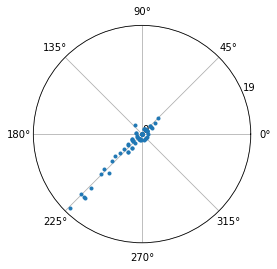

D:/Ratchet_compare/ratchet4/20201214a-ratchet(simple increasing)5LINEAR.avi


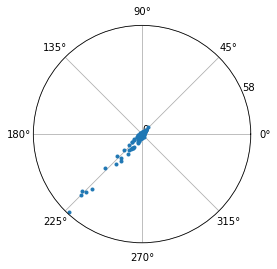

D:/Ratchet_compare/ratchet4/20201214a-ratchet(simple increasing)SQUARE.avi


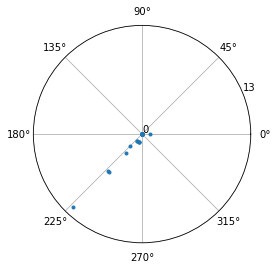

D:/Ratchet_compare/ratchet3/20201026a-ratchet(simple increasing)linear.avi


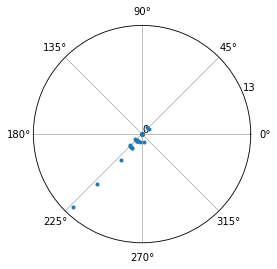

D:/Ratchet_compare/ratchet3/20201102a-ratchet(simple increasing)square4.avi


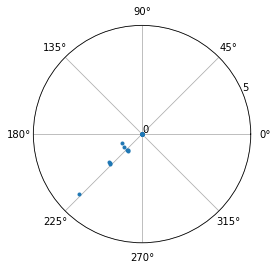

D:/Ratchet_compare/ratchet3/20201026a-ratchet(simple increasing)exp3.avi


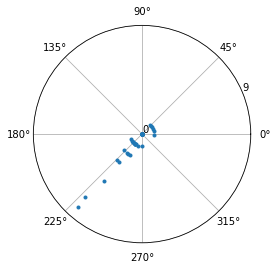

In [9]:
filelist = [
        'D:/Ratchet_compare/ratchet4/20201123a-ratchet(simple increasing)5EXP.avi',
        'D:/Ratchet_compare/ratchet4/20201214a-ratchet(simple increasing)5LINEAR.avi',
        'D:/Ratchet_compare/ratchet4/20201214a-ratchet(simple increasing)SQUARE.avi',
        'D:/Ratchet_compare/ratchet3/20201026a-ratchet(simple increasing)linear.avi',
        'D:/Ratchet_compare/ratchet3/20201102a-ratchet(simple increasing)square4.avi',
        'D:/Ratchet_compare/ratchet3/20201026a-ratchet(simple increasing)exp3.avi',
        ]

meanVlist = []
stdVlist = []
travelLlist = []
stdLlist = []
for filename in filelist :
    trackname = filename[:-4]+'_track.pkl'
    trackdata = pd.read_pickle(trackname)
    infoname = filename[:-4]+'_trackinfo.pkl'
    trackinfo = pd.read_pickle(infoname)
    filterinfo = trackinfo.loc[(trackinfo['maxmove'] >= 100)].sort_values(by='IDcounts',ascending=False)
    degreeCount = np.zeros(360)
    thetalist = []
#         print(filename)
#         print(pd.unique(filterinfo['ID'].values))
    for vID in pd.unique(filterinfo['ID'].values):
        x0=trackdata.loc[trackdata['particle']==vID]['x'].values[0]
        y0=trackdata.loc[trackdata['particle']==vID]['x'].values[-1]
        xn=trackdata.loc[trackdata['particle']==vID]['y'].values[0]
        yn=trackdata.loc[trackdata['particle']==vID]['y'].values[-1]
        theta=degrees(atan2(yn-y0,xn-x0))
        thetalist.append(round(theta))
        #print(diffx,diffy,print (dict( (l, thetalist.count(l) ) for l in set(thetalist))))
    tempCount = dict( (l, thetalist.count(l) ) for l in set(thetalist))
    for key, value in tempCount.items():
        degreeCount[key]=degreeCount[key]+value
    print(filename)
#     plt.figure()
#     plottheta = np.linspace(0, 2*np.pi, 360)
#     plt.polar(plottheta, degreeCount,'.')
#     plt.show()
    plottheta = np.linspace(0, 2*np.pi, 360)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(plottheta, degreeCount,'.')
    ax.set_rmax(max(degreeCount)+1)
#     ax.set_rticks(list(range(int(max(degreeCount)+1))))  # Less radial ticks
    ax.set_rticks([0,int(max(degreeCount)+1)])
    plt.show()





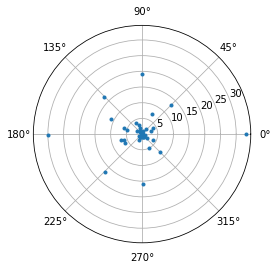

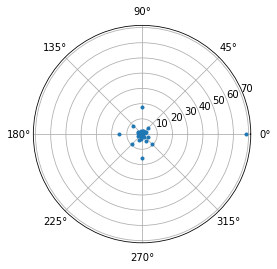

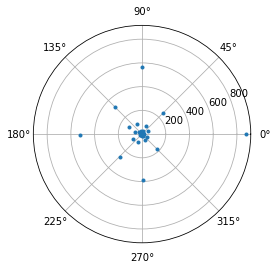

In [21]:
filelist = ['E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker).avi',
        'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)2.avi',
        'E:/0811/20200811a-ratchet-noise(alter stimulus and periodic chacker)3.avi',
            ]

meanVlist = []
stdVlist = []
travelLlist = []
stdLlist = []
for filename in filelist :
    trackname = filename[:-4]+'_track.pkl'
    trackdata = pd.read_pickle(trackname)
    filterinfo = trackinfo.loc[(trackinfo['maxmove'] >= 100)].sort_values(by='IDcounts',ascending=False)
    degreeCount = np.zeros(360)
    for vID in pd.unique(filterinfo['ID'].values):
        filterid = (trackdata['particle']==vID)
        x=trackdata[filterid]['x'].values
        y=trackdata[filterid]['y'].values
        thetalist = []

        for diffx, diffy in zip(np.diff(x[:]),np.diff(y[:])):
            theta = degrees(atan2(diffy,diffx))
            #theta = atan2(diffy,diffx)/math.pi*180
            thetalist.append(round(theta))
        #print(diffx,diffy,print (dict( (l, thetalist.count(l) ) for l in set(thetalist))))
        tempCount = dict( (l, thetalist.count(l) ) for l in set(thetalist))
        for key, value in tempCount.items():
            degreeCount[key]=degreeCount[key]+value
    
    plt.figure()
    plottheta = np.linspace(0, 2*np.pi, 360)
    plt.polar(plottheta, degreeCount,'.')